In [70]:
M = 60
channel = 'DL'

import os
import sys
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-notebook')

In [71]:
# load csv files
fBDT = os.path.join(f'/home/gsaha/Work/DelphesML/Project2/BDT/IC_Model_ChiMass_{M}_{channel}', f'ROC_Info_{M}_{channel}.csv')
fXGB = os.path.join(f'/home/gsaha/Work/DelphesML/Project2/XGBoost/{channel}_MX_{M}_Final', f'ROC_Info_{M}_{channel}.csv')
fDNN = os.path.join(f'/home/gsaha/Work/DelphesML/Project2/DNN/{channel}_MX_{M}_Final', f'ROC_Info_{M}_{channel}.csv')

pdBDT   = pd.read_csv(fBDT)
headers = pdBDT.columns.values.tolist()
fprBDT = list(pdBDT[headers[0]])
tprBDT = list(pdBDT[headers[1]])

pdXGB  = pd.read_csv(fXGB)
fprXGB = list(pdXGB[headers[0]])
tprXGB = list(pdXGB[headers[1]])

pdDNN  = pd.read_csv(fDNN)
fprDNN = list(pdDNN[headers[0]])
tprDNN = list(pdDNN[headers[1]])

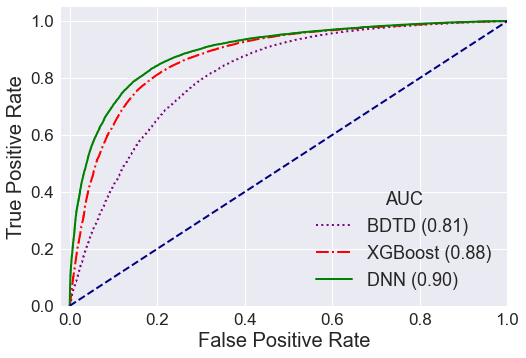

In [72]:
# ROC
roc_auc_BDT = auc(fprBDT, tprBDT)
roc_auc_XGB = auc(fprXGB, tprXGB)
roc_auc_DNN = auc(fprDNN, tprDNN)

plt.figure()
lw = 2
plt.plot(fprBDT, tprBDT, color='purple',
         lw=lw, ls = 'dotted', label='BDTD (%0.2f)' %roc_auc_BDT)
plt.plot(fprXGB, tprXGB, color='red',
         lw=lw, ls = 'dashdot', label='XGBoost (%0.2f)' %roc_auc_XGB)
plt.plot(fprDNN, tprDNN, color='green',
         lw=lw, ls = 'solid', label='DNN (%0.2f)' %roc_auc_DNN)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
#plt.title('ROC curve')
plt.legend(loc="lower right", fontsize=18, title = 'AUC', title_fontsize=18, fancybox=False)
plt.savefig(f'ROC_{M}_{channel}.pdf', dpi=300)
plt.show()